# Keywords

This notebook will count & tabulate all the statistically significant keywords in the carrel as well as visualize the result as a word cloud. This notebook demonstrates one way to model the carrel's aboutness.

In [1]:
# configure
ETC      = 'etc'
DATABASE = 'reader.db'
SQL      = '''SELECT LOWER( keyword ) AS keyword,
                     COUNT( LOWER( keyword ) ) AS count
              FROM wrd
              GROUP BY LOWER( keyword )
              ORDER BY count DESC, keyword;'''
HEIGHT   = 960
WIDTH    = 1280
COLOR    = 'white'

In [2]:
# require
from pathlib import Path
import sqlite3
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
# initialize
carrel                 = Path().absolute().parent
database               = carrel/ETC/DATABASE
connection             = sqlite3.connect( database  )
connection.row_factory = sqlite3.Row
rows                   = connection.execute( SQL )
frequencies            = {}

In [4]:
# loop through the search result, output, and update the list of frequencies
for row in rows : 

    # make sure there is an actual result
    if row[ 'keyword' ] :
        
        # output
        print( "\t".join( [ row[ 'keyword' ], str( row[ 'count' ] ) ] ) )
        
        # update
        frequencies[ row[ 'keyword' ] ] = row[ 'count' ]

achaeans	18
trojans	18
ulysses	17
hector	11
jove	11
telemachus	9
achilles	8
man	5
menelaus	5
agamemnon	3
son	3
alcinous	2
minerva	2
patroclus	2
penelope	2
phaeacians	2
ship	2
aeneas	1
antilochus	1
atreus	1
autolycus	1
bow	1
calypso	1
circe	1
diomed	1
eumaeus	1
hades	1
idomeneus	1
irus	1
laertes	1
mars	1
nausicaa	1
nestor	1
pisistratus	1
priam	1
scylla	1
sea	1
tydeus	1


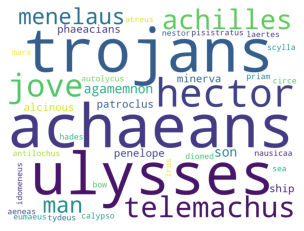

In [5]:
# use the frequencies to create a word cloud and output the result
wordcloud = WordCloud( width=WIDTH, height=HEIGHT, background_color=COLOR )
wordcloud.generate_from_frequencies( frequencies )
plt.figure()
plt.imshow( wordcloud )
plt.axis( "off" )
plt.show()

In [6]:
# clean up and done
connection.close()
exit()